In [ ]:
!pip install tensorflow
!pip install nltk
!python -m nltk.downloader wordnet
!pip install sentence-transformers
!pip install joblib
!pip install scikit-multilearn

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os


from nltk import download
download('stopwords')

import nltk
nltk.download('wordnet')

nltk.download('punkt')

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from skmultilearn.problem_transform import ClassifierChain
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import accuracy_score
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/Jigsaw_LSTM/train.csv")

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
text_len=[]

for text in df.comment_text:
    leng=len(text.split())
    text_len.append(leng)

df['text_len']=text_len

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_len
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,47
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,18
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,12
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,25


<ipython-input-20-e327758d48e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.countplot(x='text_len', data= df[df['text_len']<10], palette='Blues_r')


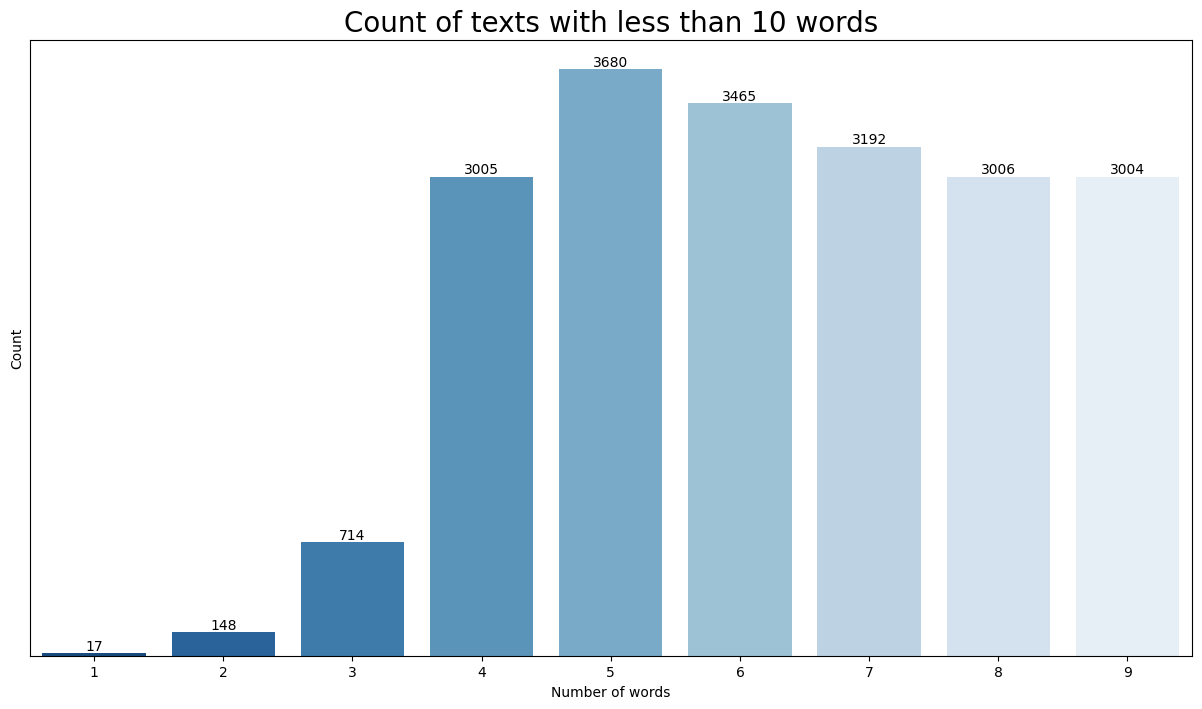

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.countplot(x='text_len', data= df[df['text_len']<10], palette='Blues_r')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.title('Count of texts with less than 10 words', fontsize=20)
plt.yticks([])
plt.ylabel('Count')
plt.xlabel('Number of words')
plt.show()

In [ ]:
# import pandas as pd
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# import re

# lemmatizer=WordNetLemmatizer()
# stop_words = set(stopwords.words("english"))

# def preprocess_text(text, comment_cleaned):

#   """
#     This function cleans and preprocesses text data.

#     Args:
#         text: The text string to be preprocessed.

#     Returns:
#         The preprocessed text string.
#   """
#   text = text.decode('utf-8')
#   text = re.sub('<.*?>', ' ', text)# removal of html characters
#   text = re.sub('[^a-zA-Z0-9]',' ',text)
#   text = text.lower().strip()  # Lowercase and remove leading/trailing whitespace
#   text = re.sub(r"[^\w\s]", " ", text)  # Replace non-alphanumeric characters with spaces
#   text = re.sub(r"\s+", " ", text)
#   text = re.sub("\n"," ",text) #remove new lines
#   text=re.sub("\s\s+" , " ", text) # remove consecutive white spaces
#   tokens = word_tokenize(text)  # Tokenize
#   filtered_tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
#   lst = []
#   for word in filtered_tokens:
#       lst.append(lemmatizer.lemmatize(word))
#   cleaned_text=' '.join(lst)
#   comment_cleaned.append(cleaned_text)
#   return comment_cleaned

In [ ]:

stop_words = set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

def preprocessing(comments,comment_cleaned):
  for text in comments:
    text=text.lower()
    #statement1-removing special characters and Punctuation
    sentence=re.sub(r'[^\w\s]','',text)
    #statement2-removing numbers from text
    sentence=re.sub(r'[0-9]+','',sentence)
    #statement3-removing html tags and urls from text
    sentence = re.sub(r'<.*?>', '', sentence)
    #statement4-removing urls from text
    clean_text = re.sub(r'http\S+', '',sentence)
    #statement5-text to word tokenization
    sentence=nltk.word_tokenize(clean_text)
    #statement6-removing stop_words
    i=0
    while i<10:
      sentence = [word for word in sentence if word.lower() not in stop_words]
      i=i+1
    lst=[]
   #statement7-lemmatization
    for word in sentence:
      lst.append(lemmatizer.lemmatize(word))
  #statement8-joing words to form sentence
    cleaned_text=' '.join(lst)
    comment_cleaned.append(cleaned_text)
  return comment_cleaned

In [ ]:
cleaned_data = []
df["comment_text"] = preprocessing(np.array(df['comment_text']), cleaned_data)

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_len
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,43
1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0,17
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,42
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0,113
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,47
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,18
159568,ffee36eab5c267c9,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,12
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,25


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/Jigsaw_LSTM/final_data.csv")

In [ ]:
df_preprocessed = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/Jigsaw_LSTM/final_data.csv")

In [ ]:
df_preprocessed

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_len
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,43
1,1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0,17
2,2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,42
3,3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0,113
4,4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...
159566,159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,47
159567,159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,18
159568,159568,ffee36eab5c267c9,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,12
159569,159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,25


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def get_comment_vector(comment, model):
  """
  This function takes a comment (string) and a FastText model as input and returns a single vector representing the average word embedding for the entire comment.
  """
  print(f"Comment: {comment}")
  word_vectors = model.encode(comment)

  return word_vectors


In [ ]:
samp = get_comment_vector("This is a house", model)

Comment: This is a house


In [ ]:
samp.shape

(384,)

In [ ]:
# print(df["comment_text"].dtypes)
df_preprocessed = df_preprocessed.loc[df_preprocessed["comment_text"].notna()]

In [ ]:
df_preprocessed

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_len
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,43
1,1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0,17
2,2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,42
3,3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0,113
4,4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...
159566,159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,47
159567,159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,18
159568,159568,ffee36eab5c267c9,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,12
159569,159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,25


In [ ]:
df_preprocessed["comment_vector"] = df_preprocessed["comment_text"].apply(get_comment_vector, args=(model,))

In [ ]:
df_vectors = df_preprocessed["comment_vector"]

In [ ]:
type(df_vectors)

pandas.core.series.Series

In [ ]:
# df_preprocessed["comment_vector"].to_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/Jigsaw_LSTM/Comment_Vectors.csv")

In [ ]:
# df_vectors=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/Jigsaw_LSTM/Vectors.csv")
# vectors = df_vectors["comment_vector"]

In [ ]:
df_vectors = df_vectors.drop(["Unnamed: 0"],axis = 1)
df_preprocessed = df_preprocessed.drop(["Unnamed: 0"],axis = 1)

In [ ]:

# Assuming df is your DataFrame
df_vectors = df_vectors.apply(np.array)


# Convert the column of arrays into a 2D numpy array
embeddings_array = np.stack(df_vectors)

# Now, embeddings_array should have the shape (1000, 384)
print(embeddings_array.shape)

(159506, 384)


In [ ]:
embeddings_array

In [ ]:
word_vectors = embeddings_array

In [ ]:
y = df_preprocessed[df_preprocessed.columns[3:9]]

In [ ]:
word_vectors.shape

(159506, 384)

In [ ]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(word_vectors, y, test_size=0.2, random_state=42)

In [ ]:
X_train

93552     [-2.00288594e-01  4.64677922e-02 -7.59936720e-...
84330     [-2.16298446e-01  9.52470228e-02 -1.46767870e-...
64240     [-0.31710276  0.17878982 -0.0253856  -0.247944...
81672     [-4.08524781e-01  2.11666912e-01 -3.98725942e-...
634       [-0.18936549 -0.01104036 -0.09568184 -0.074847...
                                ...                        
119879    [-2.72475690e-01  2.40985230e-01 -8.69375095e-...
103694    [-2.81378925e-02  2.88534522e-01 -3.08169574e-...
131932    [-3.37298602e-01 -2.44064227e-01 -2.14036796e-...
146867    [-3.08996379e-01 -2.39436720e-02 -7.73815215e-...
121958    [-0.17270452  0.28398013 -0.2018407  -0.078081...
Name: comment_vector, Length: 127641, dtype: object

In [ ]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
93552,0,0,0,0,0,0
84330,0,0,0,0,0,0
64240,0,0,0,0,0,0
81672,0,0,0,0,0,0
634,0,0,0,0,0,0
...,...,...,...,...,...,...
119879,0,0,0,0,0,0
103694,1,0,0,0,1,0
131932,0,0,0,0,0,0
146867,0,0,0,0,0,0


In [ ]:
model_reg = ClassifierChain(LogisticRegression(max_iter=1000))
model_reg.fit(X_train, y_train)

ClassifierChain(base_estimator=LogisticRegression(max_iter=1000))

In [ ]:

y_pred = model_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9171838756190834


In [ ]:
y_test

,toxic,severe_toxic,obscene,threat,insult,identity_hate
135078,0,0,0,0,0,0
92427,0,0,0,0,0,0
13536,0,0,0,0,0,0
82788,0,0,0,0,0,0
109893,0,0,0,0,0,0
...,...,...,...,...,...,...
54505,0,0,0,0,0,0
63041,0,0,0,0,0,0
98840,0,0,0,0,0,0
121922,1,0,1,0,1,0


In [ ]:
y_pred

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
joblib.dump(model_reg, '/content/drive/MyDrive/Colab Notebooks/Intent Classification/model_reg.pkl')

['/content/drive/MyDrive/Colab Notebooks/Intent Classification/model_reg.pkl']

In [ ]:
loaded_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/Intent Classification/model_reg.pkl")

In [ ]:
def transform(sentence, model):
    sentence = preprocessing(np.array(sentence), cleaned_data_3)
    sentence_vector = [get_comment_vector(comment, model) for comment in cleaned_data_3]
    return sentence_vector

In [ ]:
sample = ["I'll kill you"]
cleaned_data_3 = []
sample_vector = transform(sample, model)

Comment: ill kill


In [ ]:
print(loaded_model.predict(sample_vector))

[[1. 0. 0. 1. 0. 0.]]


In [ ]:
val_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/Jigsaw_LSTM/test.csv")

In [ ]:
val_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/Jigsaw_LSTM/test_labels.csv")

In [ ]:
val_labels = val_labels[val_labels.columns[1:]]

In [ ]:
val_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
val_df = pd.concat([val_data, val_labels], axis=1)

In [ ]:
val_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",-1,-1,-1,-1,-1,-1


In [ ]:
import pandas as pd

# Filter out rows containing -1 in any of the specified columns
val_filtered_df = val_df.loc[~(val_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] == -1).any(axis=1)]

# Print the filtered dataframe
print(val_filtered_df)


                      id                                       comment_text  \
5       0001ea8717f6de06  Thank you for understanding. I think very high...   
7       000247e83dcc1211                   :Dear god this site is horrible.   
11      0002f87b16116a7f  "::: Somebody will invariably try to add Relig...   
13      0003e1cccfd5a40a  " \n\n It says it right there that it IS a typ...   
14      00059ace3e3e9a53  " \n\n == Before adding a new product to the l...   
...                  ...                                                ...   
153150  fff8f64043129fa2  :Jerome, I see you never got around to this…! ...   
153151  fff9d70fe0722906  ==Lucky bastard== \n http://wikimediafoundatio...   
153154  fffa8a11c4378854  ==shame on you all!!!== \n\n You want to speak...   
153155  fffac2a094c8e0e2  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...   
153156  fffb5451268fb5ba  " \n\n == Unicorn lair discovery == \n\n Suppo...   

        toxic  severe_toxic  obscene  threat  insul

In [ ]:
val_filtered_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
import pandas as pd

# Filter out rows containing 0 in all of the specified columns
val_filtered_df_2 = val_filtered_df.loc[~(val_filtered_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] == 0).all(axis=1)]

# Print the filtered dataframe
print(val_filtered_df_2)


                      id                                       comment_text  \
21      00091c35fa9d0465  == Arabs are committing genocide in Iraq, but ...   
48      0013fed3aeae76b7  DJ Robinson is gay as hell! he sucks his dick ...   
59      0017d4d47894af05               :Fuck off, you anti-semitic cunt.  |   
76      001d739c97bc2ae4  How dare you vandalize that page about the HMS...   
81      001eff4007dbb65b  ::No, he is an arrogant, self serving, immatur...   
...                  ...                                                ...   
152908  ff91c3d8a3e34398                          NIGEL IS A CRAZY IDIOT!!!   
153049  ffd49b8defd069d0    " \n ::Well, now don't I feel stupid....   ·  "   
153078  ffdf6854b41d9102  ==Fourth Baldrick possibly being cleverer than...   
153119  ffebe90c8d5acaba  " \n\n == IRAN == \n That’s right, Iran. It wa...   
153155  fffac2a094c8e0e2  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...   

        toxic  severe_toxic  obscene  threat  insul

In [ ]:
val_filtered_df_2

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
21,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",1,0,0,0,0,0
48,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,1,0,1,0,1,1
59,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",1,0,1,0,1,0
76,001d739c97bc2ae4,How dare you vandalize that page about the HMS...,1,0,0,0,0,0
81,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
152908,ff91c3d8a3e34398,NIGEL IS A CRAZY IDIOT!!!,1,0,0,0,1,0
153049,ffd49b8defd069d0,""" \n ::Well, now don't I feel stupid.... · """,0,0,0,0,1,0
153078,ffdf6854b41d9102,==Fourth Baldrick possibly being cleverer than...,1,0,0,0,0,0
153119,ffebe90c8d5acaba,""" \n\n == IRAN == \n That’s right, Iran. It wa...",1,0,1,0,0,0


In [ ]:
val_labels

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [ ]:
val_data = val_data.loc[val_data["comment_text"].notna()]

In [ ]:
len(val_data)

153164

In [ ]:
cleaned_data = []
sentence_vector = [get_comment_vector(comment, model) for comment in cleaned_data[1:]]

In [ ]:
cleaned_data_2 = []
val_vectors = transform(val_filtered_df_2["comment_text"], model)

In [ ]:
val_vectors_df = pd.DataFrame(val_vectors)
val_vectors_counts = val_vectors_df.isna().sum()


In [ ]:
y_pred = loaded_model.predict(val_vectors)

In [ ]:
val_labels = val_filtered_df_2[val_filtered_df_2.columns[2:]]

In [ ]:
val_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
21,1,0,0,0,0,0
48,1,0,1,0,1,1
59,1,0,1,0,1,0
76,1,0,0,0,0,0
81,1,0,1,0,1,0
...,...,...,...,...,...,...
152908,1,0,0,0,1,0
153049,0,0,0,0,1,0
153078,1,0,0,0,0,0
153119,1,0,1,0,0,0


In [ ]:
y_pred

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1.]])

In [ ]:
print(type(val_labels))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
print(accuracy_score(val_labels, y_pred))

0.2867211276629825
